In [1]:
from pyspark import SparkConf, SparkContext
import collections

In [2]:
# set master node on the local machine,not on the cluster
conf = SparkConf().setMaster('local').setAppName('RatingsHistogram')

# sc for SparkContext
sc = SparkContext(conf=conf)

In [3]:
'''
read local textFile, what it really does is break into line by line
each line is corresponed to a value of RDD

e.g., 196 242 3 881250949
'''
lines = sc.textFile('ml-100k/u.data')   # lines is a RDD Object

# transform new RDD, assign to ratings
ratings = lines.map(lambda x: x.split()[2])

# now call a RDD Action: countByValue
result = ratings.countByValue()

In [4]:
print(type(ratings))
print(ratings.countByValue())
print(type(lines))
print(type(conf))

<class 'pyspark.rdd.PipelinedRDD'>
defaultdict(<class 'int'>, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})
<class 'pyspark.rdd.RDD'>
<class 'pyspark.conf.SparkConf'>


In [7]:
sorted_results = collections.OrderedDict(sorted(result.items(), reverse=True))
for key,value in sorted_results.items():
    print(key, value)

5 21201
4 34174
3 27145
2 11370
1 6110


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('seaborn')
%matplotlib inline

In [11]:
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['userid', 'movieid', 'rating', 'timestamp'])

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [17]:
df.head()

,userid,movieid,rating,timestamp
0,196,242,3,1970-01-01 00:00:00.881250949
1,186,302,3,1970-01-01 00:00:00.891717742
2,22,377,1,1970-01-01 00:00:00.878887116
3,244,51,2,1970-01-01 00:00:00.880606923
4,166,346,1,1970-01-01 00:00:00.886397596


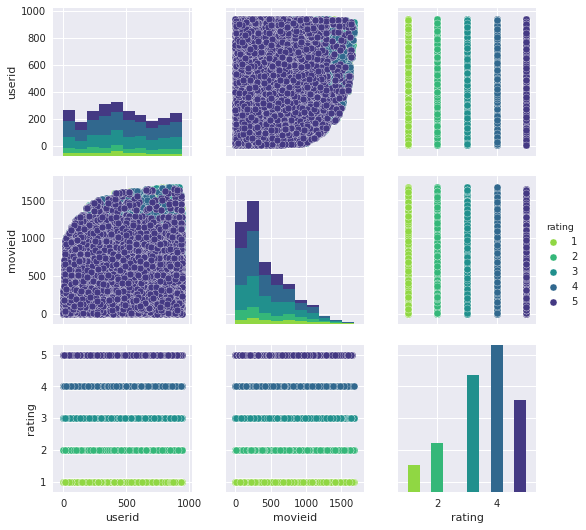

In [18]:
plt.figure(figsize=(9,9))
sns.pairplot(df, hue='rating', palette='viridis_r')

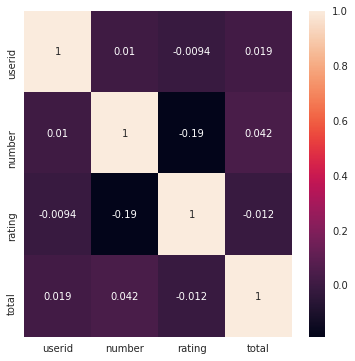

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)